In [71]:
from sodapy import Socrata
import pandas as pd

# Ohne App Token (für kleine Tests)
client = Socrata("data.cityofnewyork.us", None, timeout=60)


In [73]:
from sodapy import Socrata
import pandas as pd

client = Socrata("data.cityofnewyork.us", None, timeout=60)

# Filter: nur Arrests ab 2024-01-01
results = client.get(
    "8h9b-rp9u",
    where="arrest_date >= '2024-01-01T00:00:00.000'",
    limit=100000
)

df_arrests = pd.DataFrame.from_records(results)

# arrest_date in echtes Datum umwandeln
df_arrests["arrest_date"] = pd.to_datetime(df_arrests["arrest_date"])

print(df_arrests["arrest_date"].min(), df_arrests["arrest_date"].max())
print(df_arrests.head())


2024-01-01 00:00:00 2024-05-22 00:00:00
  arrest_key arrest_date pd_cd                      pd_desc ky_cd  \
0  279791318  2024-01-01   705           FORGERY,ETC.-MISD.   358   
1  279789893  2024-01-01   105            STRANGULATION 1ST   106   
2  279794794  2024-01-01   101                    ASSAULT 3   344   
3  279779821  2024-01-01   109     ASSAULT 2,1,UNCLASSIFIED   106   
4  279784122  2024-01-01   209  BURGLARS TOOLS,UNCLASSIFIED   231   

                      ofns_desc    law_code law_cat_cd arrest_boro  \
0      OFFENSES INVOLVING FRAUD  PL 1702000          M           B   
1                FELONY ASSAULT  PL 1211200          F           Q   
2  ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   
3                FELONY ASSAULT  PL 1200502          F           Q   
4               BURGLAR'S TOOLS  PL 1403500          M           K   

  arrest_precinct jurisdiction_code age_group perp_sex  \
0              42                 0     25-44        M   
1       

In [80]:
df_arrests.shape

(100000, 19)

In [75]:
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   arrest_key         100000 non-null  object        
 1   arrest_date        100000 non-null  datetime64[ns]
 2   pd_cd              99998 non-null   object        
 3   pd_desc            100000 non-null  object        
 4   ky_cd              99987 non-null   object        
 5   ofns_desc          100000 non-null  object        
 6   law_code           100000 non-null  object        
 7   law_cat_cd         99352 non-null   object        
 8   arrest_boro        100000 non-null  object        
 9   arrest_precinct    100000 non-null  object        
 10  jurisdiction_code  100000 non-null  object        
 11  age_group          100000 non-null  object        
 12  perp_sex           100000 non-null  object        
 13  perp_race          100000 non-null  object   

In [81]:
df_arrests["arrest_date"]       #date
df_arrests["arrest_boro"]       #borough like district
df_arrests["arrest_precinct"]   #police precinct
df_arrests["ofns_desc"].unique()        #offense description

array(['OFFENSES INVOLVING FRAUD', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', "BURGLAR'S TOOLS",
       'VEHICLE AND TRAFFIC LAWS', 'SEX CRIMES', 'BURGLARY',
       'PETIT LARCENY', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'OFF. AGNST PUB ORD SENSBLTY &', 'ROBBERY', 'DANGEROUS WEAPONS',
       'INTOXICATED & IMPAIRED DRIVING', 'CRIMINAL MISCHIEF & RELATED OF',
       'POSSESSION OF STOLEN PROPERTY', 'FOR OTHER AUTHORITIES',
       'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'OFFENSES RELATED TO CHILDREN', 'DANGEROUS DRUGS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'OTHER OFFENSES RELATED TO THEFT', 'FORGERY', 'HARRASSMENT 2',
       'OFFENSES AGAINST PUBLIC SAFETY', 'INTOXICATED/IMPAIRED DRIVING',
       'CRIMINAL TRESPASS', 'GAMBLING', 'RAPE', 'OTHER STATE LAWS',
       'OTHER STATE LAWS (NON PENAL LAW)',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER T

In [82]:


df_arrests[df_arrests["ofns_desc"].isin([
    "ROBBERY", 
    "ASSAULT 3 & RELATED OFFENSES", 
    "OFFENSES AGAINST PUBLIC SAFETY",
    "KIDNAPPING & RELATED OFFENSES", 
    "THEFT-FRAUD"])]


,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat
2,279794794,2024-01-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,14,0,25-44,M,WHITE,987111,212421,40.749725,-73.989674,"{'type': 'Point', 'coordinates': [-73.989674, ..."
10,279788457,2024-01-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,F,BLACK,1009964,235580,40.813254,-73.907106,"{'type': 'Point', 'coordinates': [-73.907106, ..."
11,279786339,2024-01-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,30,0,25-44,M,WHITE HISPANIC,998555,239131,40.823026,-73.948314,"{'type': 'Point', 'coordinates': [-73.948314, ..."
12,279794300,2024-01-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,41,0,25-44,F,BLACK,1015842,236510,40.815786,-73.885865,"{'type': 'Point', 'coordinates': [-73.885865, ..."
15,279788466,2024-01-01,113,"MENACING,UNCLASSIFIED",344,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,75,0,25-44,M,BLACK,1015379,182115,40.666486,-73.887791,"{'type': 'Point', 'coordinates': [-73.887791, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99977,287311439,2024-05-22,113,"MENACING,UNCLASSIFIED",344,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,62,0,45-64,F,ASIAN / PACIFIC ISLANDER,984627,158161,40.600792,-73.998639,"{'type': 'Point', 'coordinates': [-73.998639, ..."
99981,287285269,2024-05-22,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,7,2,18-24,F,BLACK,989876,200901,40.718103,-73.979704,"{'type': 'Point', 'coordinates': [-73.979704, ..."
99984,287252955,2024-05-22,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,75,0,45-64,M,BLACK,1015455,176916,40.652217,-73.88754,"{'type': 'Point', 'coordinates': [-73.88754, 4..."
99994,287296403,2024-05-22,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,111,0,25-44,M,WHITE HISPANIC,1048681,216304,40.760148,-73.767422,"{'type': 'Point', 'coordinates': [-73.767422, ..."


In [83]:
from sodapy import Socrata
import pandas as pd

# Verbindung herstellen
client = Socrata("data.cityofnewyork.us", None)

# ---- CECM Event Data laden ----
print("🔄 Lade alle Events-Daten...")
results = client.get("8h9b-rp9u", limit=100000)

# In DataFrame umwandeln
df_events = pd.DataFrame.from_records(results)
print(f"✅ {len(df_events)} Events geladen")

if len(df_events) > 0:
    print(f"Verfügbare Spalten: {list(df_events.columns)}")
    
    # Datumsfelder verarbeiten
    if "start_date_time" in df_events.columns:
        df_events["start_date_time"] = pd.to_datetime(df_events["start_date_time"], errors="coerce")
        
        # Verfügbare Jahre zeigen
        if not df_events["start_date_time"].isna().all():
            years_available = df_events["start_date_time"].dt.year.value_counts().sort_index()
            print(f"📊 Verfügbare Event-Jahre: {years_available.to_dict()}")
            
            # Nach dem gleichen Jahr filtern wie die Arrests
            if 'df_arrests' in locals() and 'arrest_date' in df_arrests.columns:
                arrest_year = df_arrests['arrest_date'].dt.year.iloc[0] if len(df_arrests) > 0 else 2024
                df_events = df_events[df_events["start_date_time"].dt.year == arrest_year].copy()
                print(f"✅ Events für {arrest_year} gefiltert: {len(df_events)} Events")
    
    if "end_date_time" in df_events.columns:
        df_events["end_date_time"] = pd.to_datetime(df_events["end_date_time"], errors="coerce")
    
    if len(df_events) > 0 and "start_date_time" in df_events.columns:
        print(f"📈 Events Zeitraum: {df_events['start_date_time'].min()} bis {df_events['start_date_time'].max()}")
    
    print(f"\n📋 Events DataFrame:")
    print(f"Shape: {df_events.shape}")
    print(df_events.head())
else:
    print("❌ Keine Events-Daten verfügbar")
    df_events = pd.DataFrame()  # Leeren DataFrame erstellen

🔄 Lade alle Events-Daten...


ReadTimeout: HTTPSConnectionPool(host='data.cityofnewyork.us', port=443): Read timed out. (read timeout=10)

In [84]:
df_events.shape

(221, 15)

In [85]:
df_events["event_borough"]
df_events["event_type"]
df_events["event_name"].unique()

array(['Softball (Little league)', 'Miscellaneous',
       'Soccer - Non Regulation',
       'Baseball - 12 and Under (Little League)',
       'Baseball - 13 and Older (Little League)',
       'Football Ã¢â\x82¬â\x80\x9c Flag Football', 'Football - Youth',
       'Kindness Carnival', 'Picnic', 'Track and Field',
       "Senator Addabbo's Paper Shredding Recycling Event",
       'ROCKAWAY BEACH SANTA SUIT 5K FUN RUN',
       'Saturday Greeter Shift and Guided Tour', 'Party',
       'Softball - Adults', 'Tennis', 'Cricket',
       'Lower East Side Farmstand Friday', 'HHFM Lenox Avenue Market',
       'Soccer -Regulation', 'Zumba', '2024 NO AMPLFIED SOUND',
       'Barbecue', 'HHFM Mt. Eden Market Thursdays', 'Frisbee',
       'Baseball - Adults', 'Basketball', 'St. Anthony Flea Market',
       'Rugby', 'Celebration', 'Temporary Full Closure',
       'Lawn closed for the season - Adventure', 'Soccer',
       'Saint James Ful-Gates Block Party',
       'SSS CPW96 Rudin Lawn Fall 24 Septemb

In [86]:
df_arrests

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,lon_lat
0,279791318,2024-01-01,705,"FORGERY,ETC.-MISD.",358,OFFENSES INVOLVING FRAUD,PL 1702000,M,B,42,0,25-44,M,WHITE HISPANIC,1009517,243117,40.83393918636223,-73.90869231647055,"{'type': 'Point', 'coordinates': [-73.90869231..."
1,279789893,2024-01-01,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,106,0,45-64,M,ASIAN / PACIFIC ISLANDER,1028604,187929,40.682389,-73.840079,"{'type': 'Point', 'coordinates': [-73.840079, ..."
2,279794794,2024-01-01,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,14,0,25-44,M,WHITE,987111,212421,40.749725,-73.989674,"{'type': 'Point', 'coordinates': [-73.989674, ..."
3,279779821,2024-01-01,109,"ASSAULT 2,1,UNCLASSIFIED",106,FELONY ASSAULT,PL 1200502,F,Q,110,0,25-44,M,WHITE HISPANIC,1018352,211952,40.74837004850126,-73.8769234357984,"{'type': 'Point', 'coordinates': [-73.87692343..."
4,279784122,2024-01-01,209,"BURGLARS TOOLS,UNCLASSIFIED",231,BURGLAR'S TOOLS,PL 1403500,M,K,60,0,25-44,M,WHITE,989590,150336,40.579314,-73.980773,"{'type': 'Point', 'coordinates': [-73.980773, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,287311423,2024-05-22,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,F,BLACK,1007626,233260,40.80689,-73.915557,"{'type': 'Point', 'coordinates': [-73.915557, ..."
99996,287314648,2024-05-22,478,"THEFT OF SERVICES, UNCLASSIFIE",343,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,B,41,1,25-44,M,BLACK,1013878,239551,40.82413799033059,-73.89294867750611,"{'type': 'Point', 'coordinates': [-73.89294867..."
99997,287272937,2024-05-22,258,"CRIMINAL MISCHIEF 4TH, GRAFFIT",351,CRIMINAL MISCHIEF & RELATED OF,PL 1456002,M,M,18,0,25-44,M,BLACK,990156,215710,40.758751,-73.978681,"{'type': 'Point', 'coordinates': [-73.978681, ..."
99998,287276325,2024-05-22,339,"LARCENY,PETIT FROM OPEN AREAS,",341,PETIT LARCENY,PL 1552500,M,Q,106,0,25-44,M,WHITE,1028604,187929,40.682389,-73.840079,"{'type': 'Point', 'coordinates': [-73.840079, ..."


In [58]:
# dataframe speichern
df_arrests.to_csv("arrests.csv", index=False)


# Data Mining and Text Mining Project Analysis

This notebook performs comprehensive analysis of NYC arrests and events data to discover patterns, correlations, and insights.

In [59]:
# Import additional libraries for data mining and analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Data Exploration and Cleaning

In [60]:
# Comprehensive data exploration
print("=== ARRESTS DATA ANALYSIS ===")
print(f"Dataset shape: {df_arrests.shape}")
print(f"Date range: {df_arrests['arrest_date'].min()} to {df_arrests['arrest_date'].max()}")
print("\nMissing values:")
print(df_arrests.isnull().sum())

print("\n=== EVENTS DATA ANALYSIS ===")
print(f"Dataset shape: {df_events.shape}")
if 'start_date_time' in df_events.columns:
    print(f"Date range: {df_events['start_date_time'].min()} to {df_events['start_date_time'].max()}")
print("\nMissing values:")
print(df_events.isnull().sum())

=== ARRESTS DATA ANALYSIS ===
Dataset shape: (260503, 19)
Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00

Missing values:
arrest_key              0
arrest_date             0
pd_cd                   8
pd_desc                 0
ky_cd                  32
ofns_desc               0
law_code                0
law_cat_cd           1390
arrest_boro             0
arrest_precinct         0
jurisdiction_code       0
age_group               0
perp_sex                0
perp_race               0
x_coord_cd              0
y_coord_cd              0
latitude                4
longitude               4
lon_lat                 4
dtype: int64

=== EVENTS DATA ANALYSIS ===
Dataset shape: (100000, 15)
Date range: 2016-05-14 10:00:00 to 2025-09-30 12:00:00

Missing values:
event_id                   0
event_name                 0
start_date_time            0
end_date_time              0
event_agency               0
event_type                 0
event_borough              0
event_location             0
s

In [87]:
# Create filtered dataset for target offenses
target_offenses = [
    "ROBBERY", 
    "ASSAULT 3 & RELATED OFFENSES", 
    "OFFENSES AGAINST PUBLIC SAFETY",
    "KIDNAPPING & RELATED OFFENSES", 
    "THEFT-FRAUD"
]

df_arrests_filtered = df_arrests[df_arrests["ofns_desc"].isin(target_offenses)].copy()
print(f"Filtered arrests dataset: {df_arrests_filtered.shape[0]} records")
print("\nOffense distribution:")
print(df_arrests_filtered["ofns_desc"].value_counts())

Filtered arrests dataset: 19132 records

Offense distribution:
ofns_desc
ASSAULT 3 & RELATED OFFENSES      14218
ROBBERY                            4670
OFFENSES AGAINST PUBLIC SAFETY      104
THEFT-FRAUD                          90
KIDNAPPING & RELATED OFFENSES        50
Name: count, dtype: int64


## 2. Statistical Analysis and Visualizations

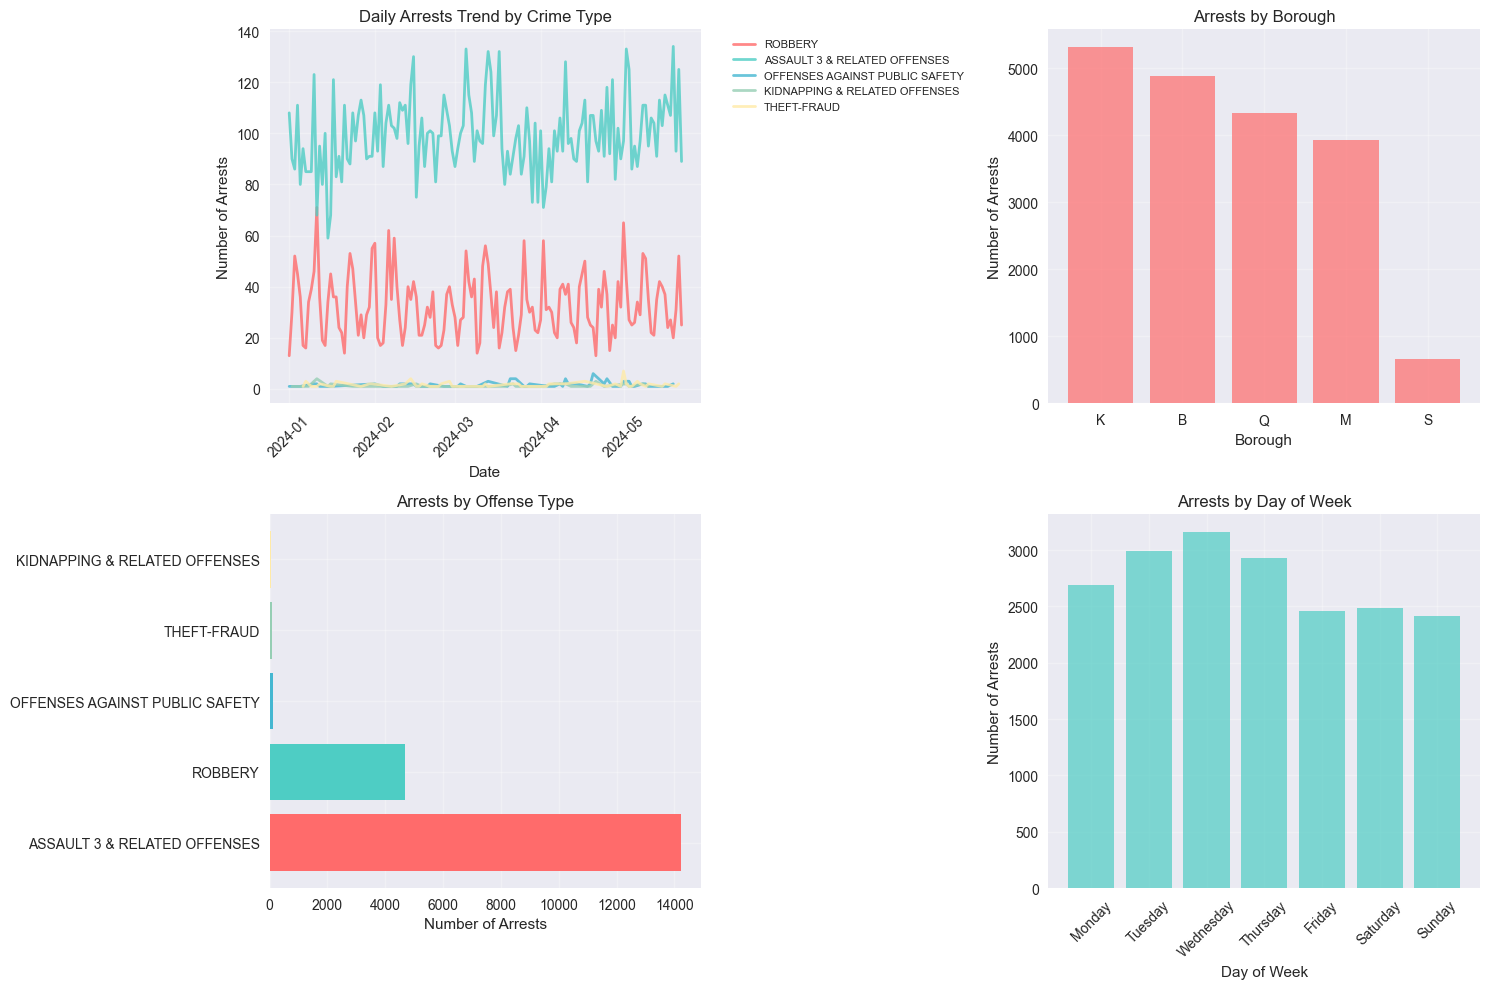

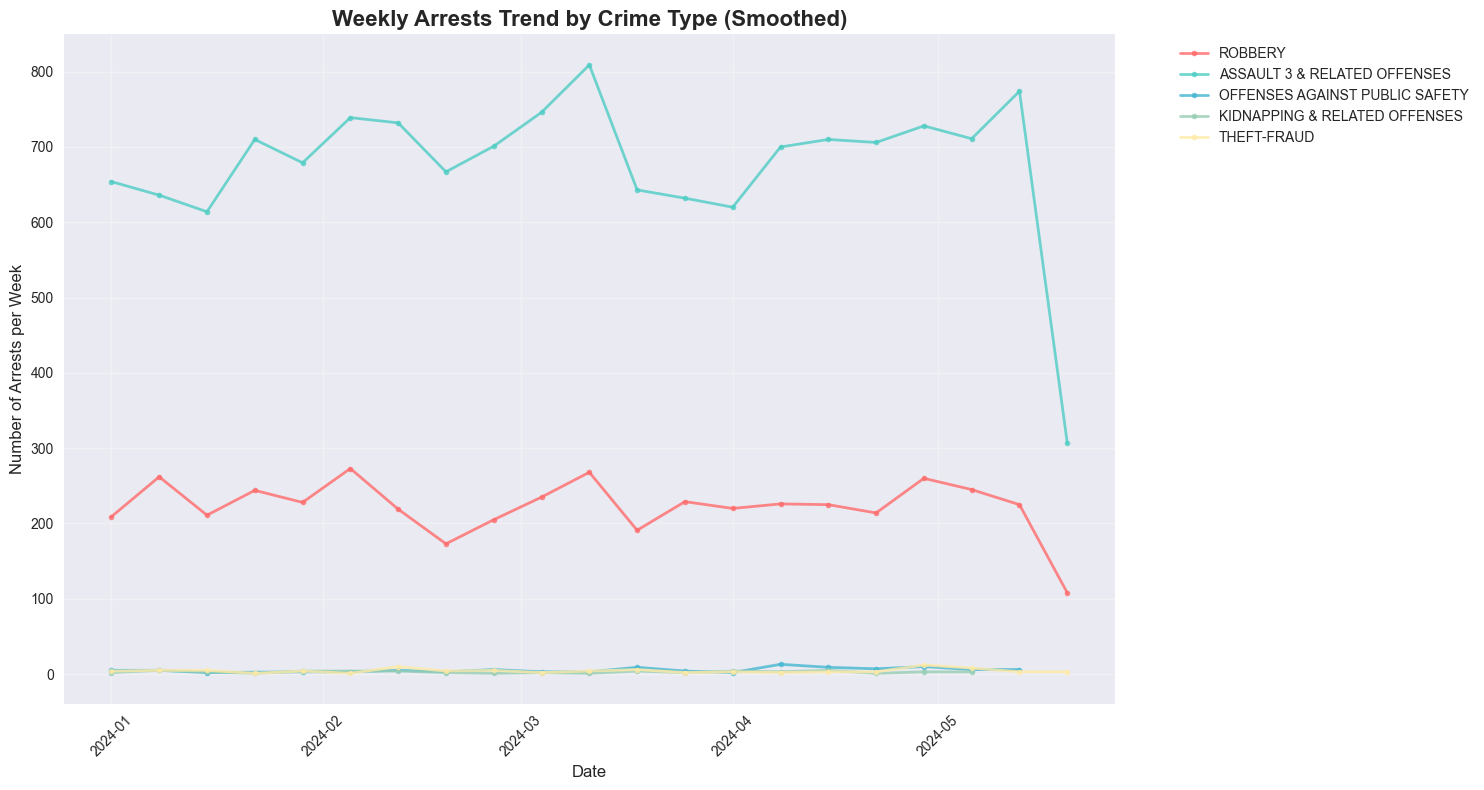

In [ ]:
# Time series analysis - Arrests by date
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Daily arrests trend by offense type
# Erstelle separate Linien für jeden Crime Type
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
for i, offense in enumerate(target_offenses):
    offense_data = df_arrests_filtered[df_arrests_filtered['ofns_desc'] == offense]
    if len(offense_data) > 0:
        daily_arrests_by_offense = offense_data.groupby(offense_data['arrest_date'].dt.date).size()
        axes[0,0].plot(daily_arrests_by_offense.index, daily_arrests_by_offense.values, 
                      label=offense, color=colors[i % len(colors)], alpha=0.8, linewidth=2)

axes[0,0].set_title('Daily Arrests Trend by Crime Type')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Number of Arrests')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0,0].grid(True, alpha=0.3)

# 2. Arrests by borough
borough_counts = df_arrests_filtered['arrest_boro'].value_counts()
axes[0,1].bar(borough_counts.index, borough_counts.values, color='#FF6B6B', alpha=0.7)
axes[0,1].set_title('Arrests by Borough')
axes[0,1].set_xlabel('Borough')
axes[0,1].set_ylabel('Number of Arrests')
axes[0,1].grid(True, alpha=0.3)

# 3. Arrests by offense type
offense_counts = df_arrests_filtered['ofns_desc'].value_counts()
axes[1,0].barh(offense_counts.index, offense_counts.values, color=colors[:len(offense_counts)])
axes[1,0].set_title('Arrests by Offense Type')
axes[1,0].set_xlabel('Number of Arrests')
axes[1,0].grid(True, alpha=0.3)

# 4. Arrests by day of week
df_arrests_filtered['day_of_week'] = df_arrests_filtered['arrest_date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_arrests_filtered['day_of_week'].value_counts().reindex(day_order)
axes[1,1].bar(day_counts.index, day_counts.values, color='#4ECDC4', alpha=0.7)
axes[1,1].set_title('Arrests by Day of Week')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Number of Arrests')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Zusätzlicher detaillierter Plot für bessere Analyse
plt.figure(figsize=(15, 8))
for i, offense in enumerate(target_offenses):
    offense_data = df_arrests_filtered[df_arrests_filtered['ofns_desc'] == offense]
    if len(offense_data) > 0:
        # Wöchentliche Aggregation für glattere Linien
        weekly_arrests = offense_data.groupby(offense_data['arrest_date'].dt.to_period('W')).size()
        weekly_dates = [period.start_time for period in weekly_arrests.index]
        
        plt.plot(weekly_dates, weekly_arrests.values, 
                label=offense, color=colors[i % len(colors)], 
                marker='o', markersize=4, linewidth=2, alpha=0.8)

plt.title('Weekly Arrests Trend by Crime Type (Smoothed)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Arrests per Week', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='uppe




















' \
'
r left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
df_events.shape

(100000, 15)

In [89]:
# Überprüfung der verfügbaren Jahre in df_events
print("=== JAHRE-ANALYSE DER EVENTS-DATEN ===")
if 'start_date_time' in df_events.columns and not df_events.empty:
    # Jahre in den Events-Daten
    years_in_events = df_events['start_date_time'].dt.year.value_counts().sort_index()
    print(f"📅 Verfügbare Jahre in df_events:")
    for year, count in years_in_events.items():
        print(f"   • {year}: {count:,} Events")
    
    print(f"\n🗓️ Datum-Bereich:")
    print(f"   • Frühestes Datum: {df_events['start_date_time'].min()}")
    print(f"   • Spätestes Datum: {df_events['start_date_time'].max()}")
    
    # Vergleich mit Arrests-Daten
    if 'df_arrests' in locals() and 'arrest_date' in df_arrests.columns and not df_arrests.empty:
        arrest_years = df_arrests['arrest_date'].dt.year.value_counts().sort_index()
        print(f"\n📊 Vergleich mit Arrests-Daten:")
        print(f"   • Arrests Jahre: {list(arrest_years.index)}")
        print(f"   • Events Jahre: {list(years_in_events.index)}")
        
        # Sind beide Datasets vom gleichen Jahr?
        common_years = set(arrest_years.index) & set(years_in_events.index)
        print(f"   • Gemeinsame Jahre: {sorted(list(common_years))}")
else:
    print("❌ Keine Events-Daten mit Zeitstempel verfügbar")

=== JAHRE-ANALYSE DER EVENTS-DATEN ===
📅 Verfügbare Jahre in df_events:
   • 2024: 221 Events

🗓️ Datum-Bereich:
   • Frühestes Datum: 2024-09-07 08:00:00
   • Spätestes Datum: 2024-12-14 10:00:00

📊 Vergleich mit Arrests-Daten:
   • Arrests Jahre: [2024]
   • Events Jahre: [2024]
   • Gemeinsame Jahre: [2024]


In [90]:
# Filter beide Datasets auf 2024
print("🔧 FILTERUNG AUF 2024-DATEN")

# Events auf 2024 filtern
if 'start_date_time' in df_events.columns and not df_events.empty:
    events_2024 = df_events[df_events['start_date_time'].dt.year == 2024].copy()
    print(f"✅ Events vor Filterung: {len(df_events):,}")
    print(f"✅ Events nach 2024-Filterung: {len(events_2024):,}")
    df_events = events_2024
    
    if len(df_events) > 0:
        print(f"📅 Events 2024 Zeitraum: {df_events['start_date_time'].min()} bis {df_events['start_date_time'].max()}")
    else:
        print("⚠️ Keine Events für 2024 gefunden!")
else:
    print("❌ Keine Events-Daten mit Zeitstempel verfügbar")

# Arrests auf 2024 filtern (falls nicht schon geschehen)
if 'arrest_date' in df_arrests.columns and not df_arrests.empty:
    arrests_2024 = df_arrests[df_arrests['arrest_date'].dt.year == 2024].copy()
    print(f"✅ Arrests vor Filterung: {len(df_arrests):,}")
    print(f"✅ Arrests nach 2024-Filterung: {len(arrests_2024):,}")
    df_arrests = arrests_2024
    
    if len(df_arrests) > 0:
        print(f"📅 Arrests 2024 Zeitraum: {df_arrests['arrest_date'].min()} bis {df_arrests['arrest_date'].max()}")
    else:
        print("⚠️ Keine Arrests für 2024 gefunden!")

print(f"\n🎯 FINALE DATASETS FÜR 2024:")
print(f"   • Arrests: {len(df_arrests):,} Zeilen")
print(f"   • Events: {len(df_events):,} Zeilen")

🔧 FILTERUNG AUF 2024-DATEN
✅ Events vor Filterung: 221
✅ Events nach 2024-Filterung: 221
📅 Events 2024 Zeitraum: 2024-09-07 08:00:00 bis 2024-12-14 10:00:00
✅ Arrests vor Filterung: 100,000
✅ Arrests nach 2024-Filterung: 100,000
📅 Arrests 2024 Zeitraum: 2024-01-01 00:00:00 bis 2024-05-22 00:00:00

🎯 FINALE DATASETS FÜR 2024:
   • Arrests: 100,000 Zeilen
   • Events: 221 Zeilen
✅ Arrests vor Filterung: 100,000
✅ Arrests nach 2024-Filterung: 100,000
📅 Arrests 2024 Zeitraum: 2024-01-01 00:00:00 bis 2024-05-22 00:00:00

🎯 FINALE DATASETS FÜR 2024:
   • Arrests: 100,000 Zeilen
   • Events: 221 Zeilen


=== COMPREHENSIVE EVENTS ANALYSIS ===
Total Events: 221


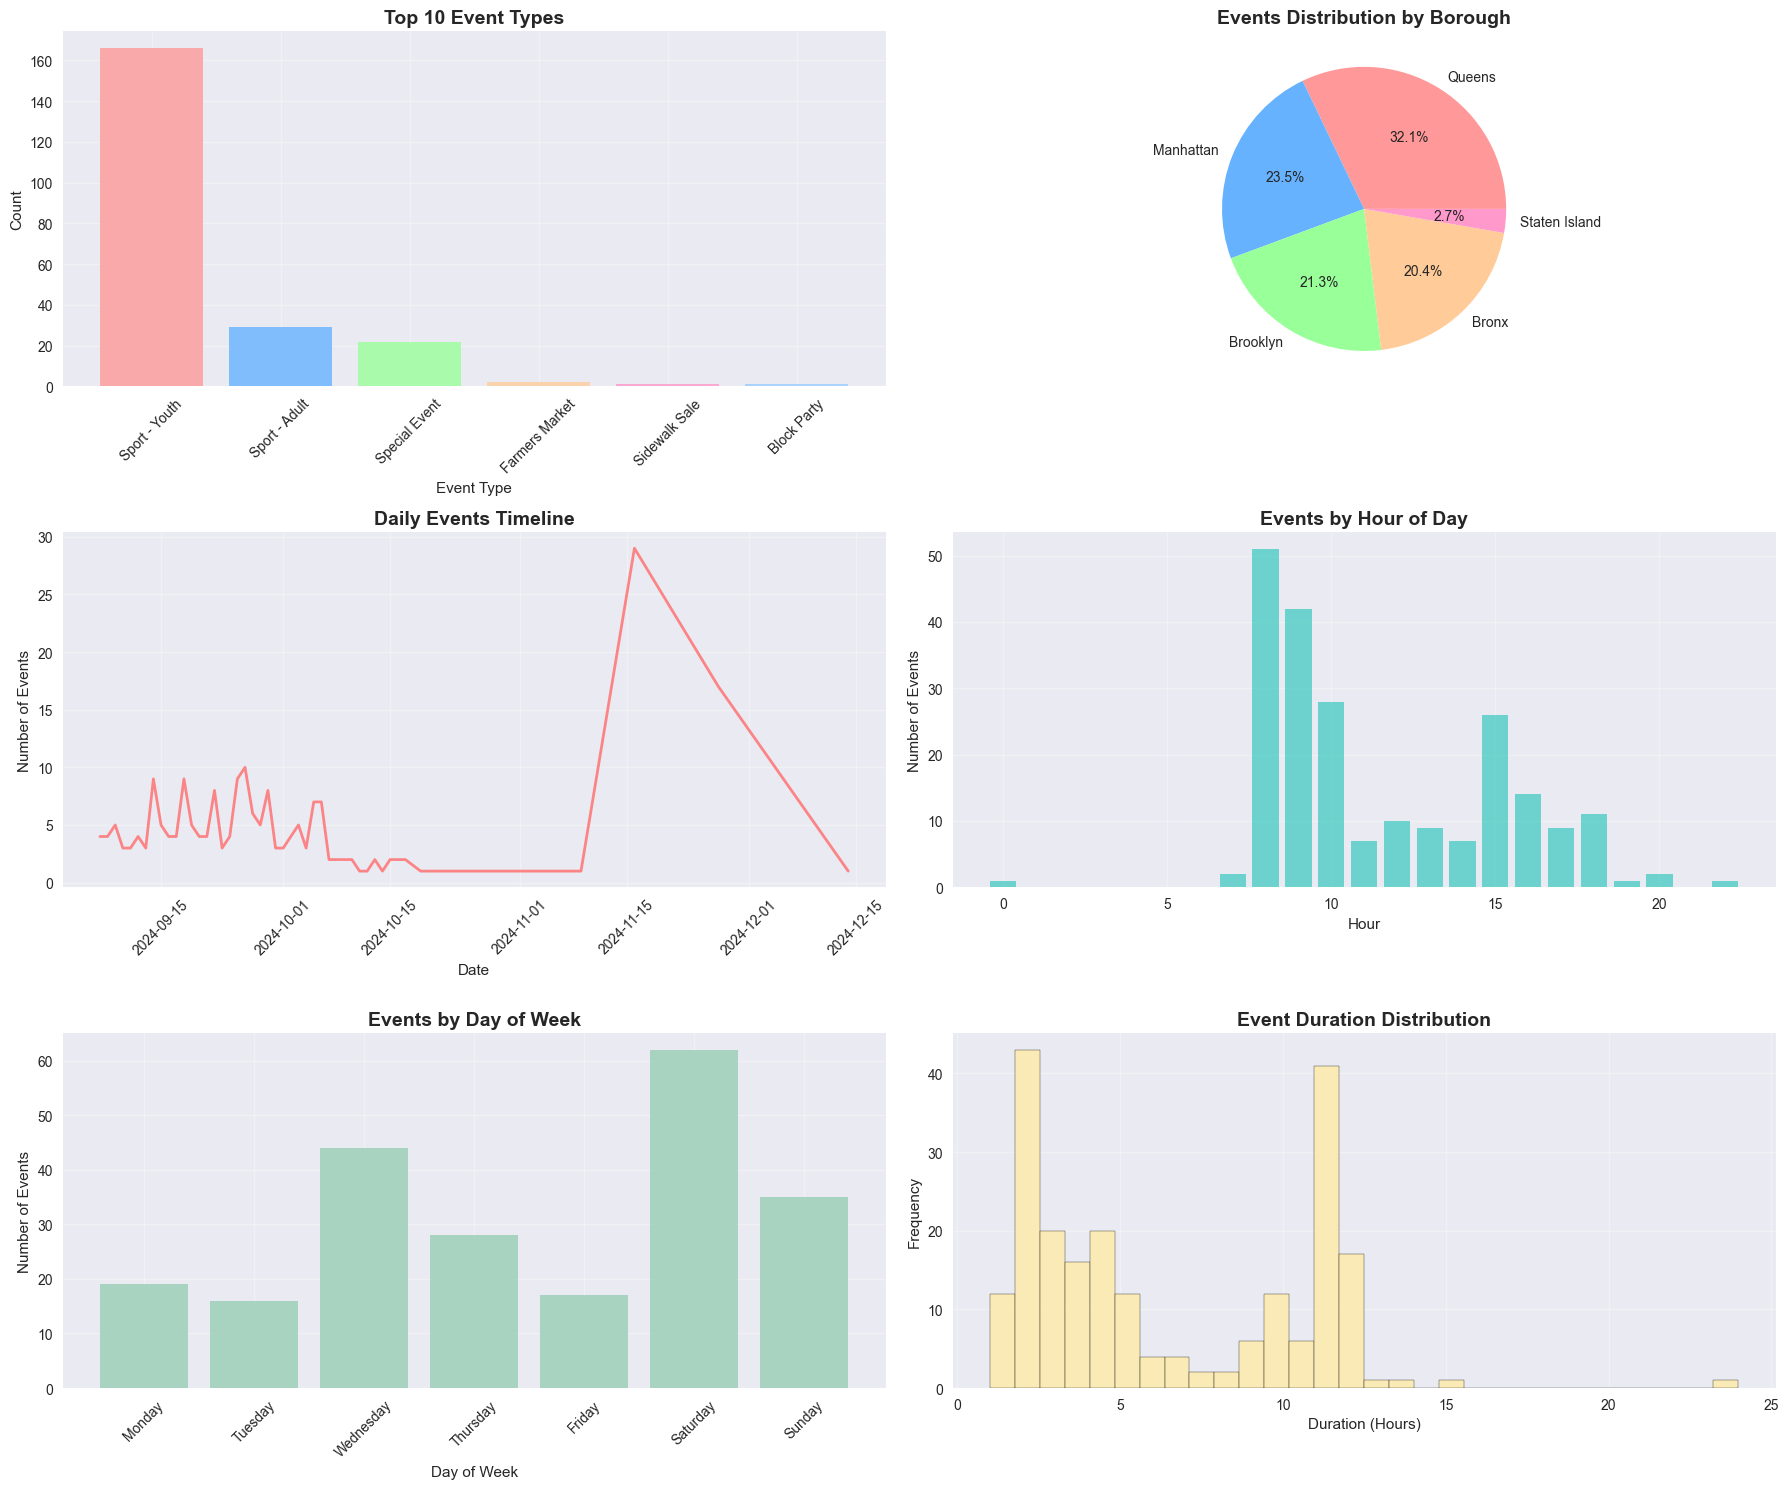

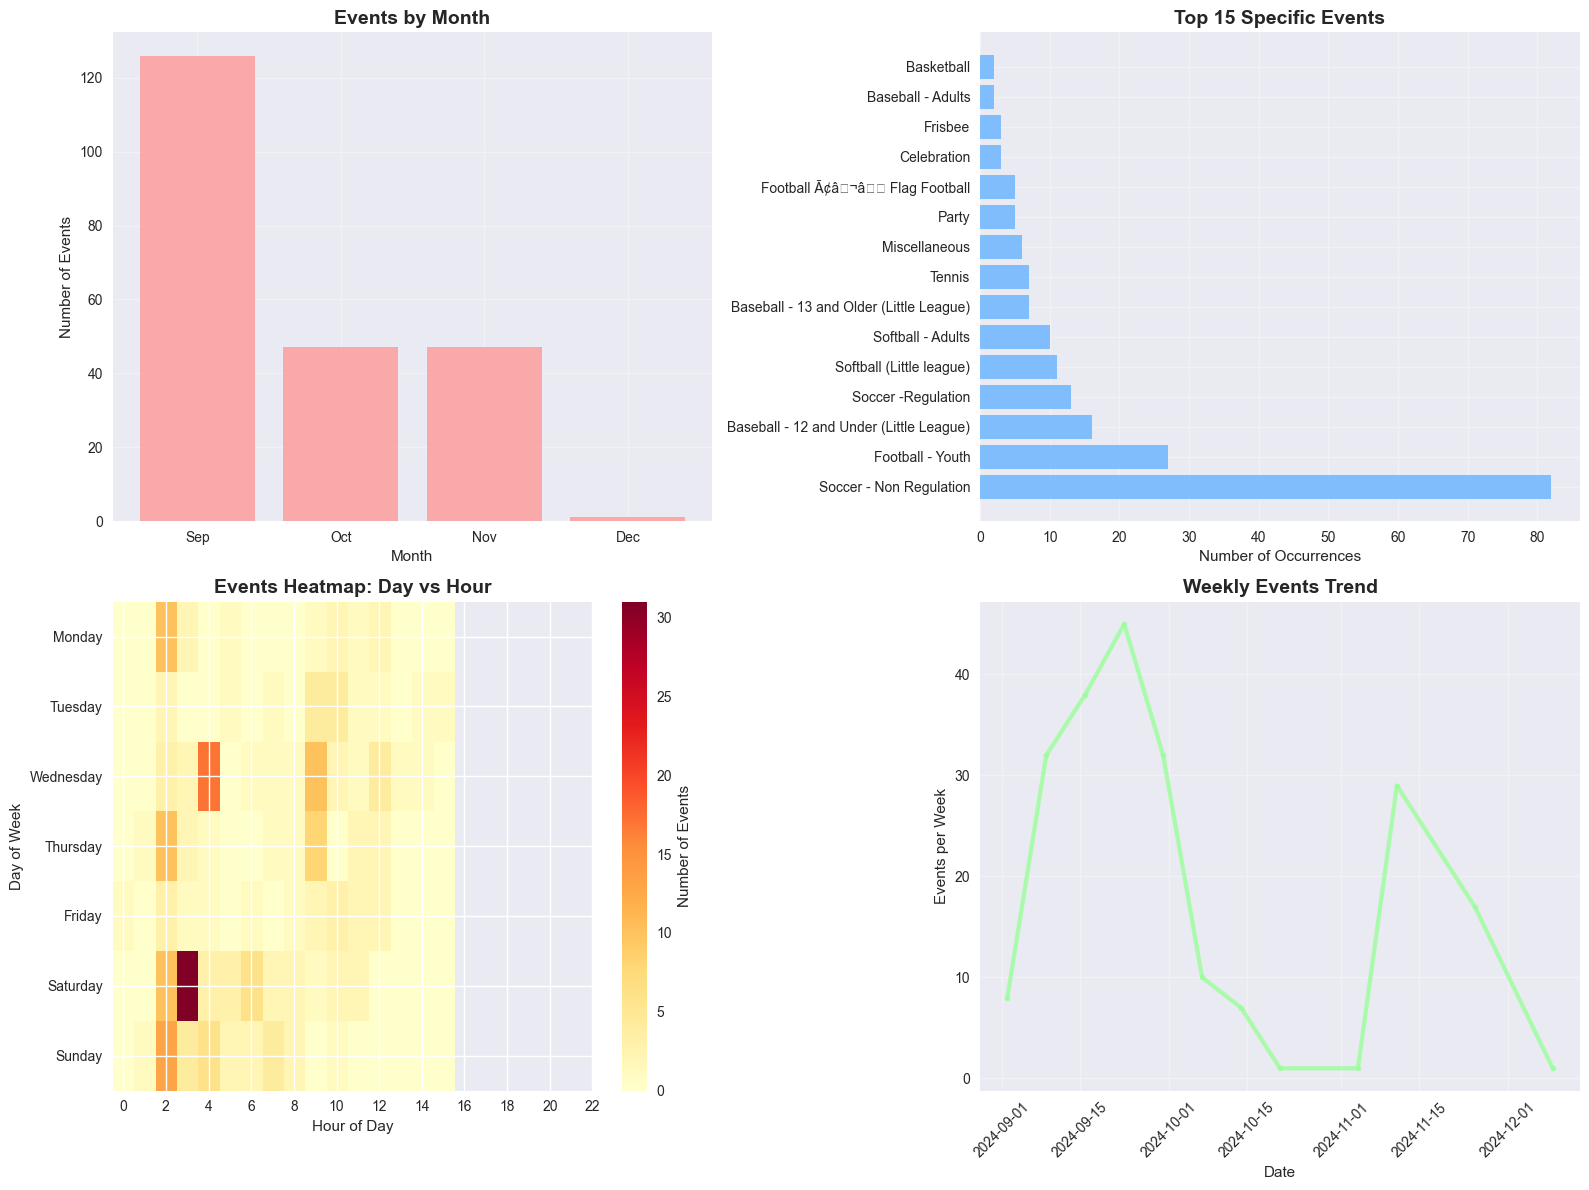


📊 EVENTS STATISTICAL SUMMARY:
   • Date Range: 2024-09-07 08:00:00 to 2024-12-14 10:00:00
   • Average Events per Day: 2.3
   • Most Common Event Type: Sport - Youth (166 occurrences)
   • Most Active Borough for Events: Queens
   • Peak Event Hour: 8:00
   • Most Active Day: Saturday


In [91]:
# Events analysis and visualization
if not df_events.empty:
    print("=== COMPREHENSIVE EVENTS ANALYSIS ===")
    print(f"Total Events: {len(df_events):,}")
    
    # Define colors for consistent styling
    event_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']
    
    # Create a comprehensive dashboard
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    
    # 1. Events by type (Top 10)
    if 'event_type' in df_events.columns:
        event_type_counts = df_events['event_type'].value_counts().head(10)
        axes[0,0].bar(event_type_counts.index, event_type_counts.values, 
                     color=event_colors[:len(event_type_counts)], alpha=0.8)
        axes[0,0].set_title('Top 10 Event Types', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Event Type')
        axes[0,0].set_ylabel('Count')
        axes[0,0].tick_params(axis='x', rotation=45)
        axes[0,0].grid(True, alpha=0.3)
    
    # 2. Events by borough
    if 'event_borough' in df_events.columns:
        event_borough_counts = df_events['event_borough'].value_counts()
        wedges, texts, autotexts = axes[0,1].pie(event_borough_counts.values, 
                                                labels=event_borough_counts.index, 
                                                autopct='%1.1f%%',
                                                colors=event_colors[:len(event_borough_counts)])
        axes[0,1].set_title('Events Distribution by Borough', fontsize=14, fontweight='bold')
    
    # 3. Daily Events Timeline
    if 'start_date_time' in df_events.columns:
        daily_events = df_events.groupby(df_events['start_date_time'].dt.date).size()
        axes[1,0].plot(daily_events.index, daily_events.values, 
                      color='#FF6B6B', linewidth=2, alpha=0.8)
        axes[1,0].set_title('Daily Events Timeline', fontsize=14, fontweight='bold')
        axes[1,0].set_xlabel('Date')
        axes[1,0].set_ylabel('Number of Events')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].grid(True, alpha=0.3)
    
    # 4. Events by Hour of Day
    if 'start_date_time' in df_events.columns:
        hourly_events = df_events['start_date_time'].dt.hour.value_counts().sort_index()
        axes[1,1].bar(hourly_events.index, hourly_events.values, 
                     color='#4ECDC4', alpha=0.8)
        axes[1,1].set_title('Events by Hour of Day', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Hour')
        axes[1,1].set_ylabel('Number of Events')
        axes[1,1].grid(True, alpha=0.3)
    
    # 5. Events by Day of Week
    if 'start_date_time' in df_events.columns:
        df_events['event_day_of_week'] = df_events['start_date_time'].dt.day_name()
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        event_day_counts = df_events['event_day_of_week'].value_counts().reindex(day_order)
        axes[2,0].bar(event_day_counts.index, event_day_counts.values, 
                     color='#96CEB4', alpha=0.8)
        axes[2,0].set_title('Events by Day of Week', fontsize=14, fontweight='bold')
        axes[2,0].set_xlabel('Day of Week')
        axes[2,0].set_ylabel('Number of Events')
        axes[2,0].tick_params(axis='x', rotation=45)
        axes[2,0].grid(True, alpha=0.3)
    
    # 6. Event Duration Analysis (if end_date_time exists)
    if 'end_date_time' in df_events.columns and not df_events['end_date_time'].isna().all():
        df_events['duration_hours'] = (df_events['end_date_time'] - df_events['start_date_time']).dt.total_seconds() / 3600
        duration_data = df_events['duration_hours'].dropna()
        if len(duration_data) > 0:
            axes[2,1].hist(duration_data, bins=30, color='#FFEAA7', alpha=0.8, edgecolor='black')
            axes[2,1].set_title('Event Duration Distribution', fontsize=14, fontweight='bold')
            axes[2,1].set_xlabel('Duration (Hours)')
            axes[2,1].set_ylabel('Frequency')
            axes[2,1].grid(True, alpha=0.3)
        else:
            axes[2,1].text(0.5, 0.5, 'No Duration Data Available', 
                          ha='center', va='center', transform=axes[2,1].transAxes, fontsize=12)
    else:
        axes[2,1].text(0.5, 0.5, 'No End Time Data Available', 
                      ha='center', va='center', transform=axes[2,1].transAxes, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Additional Analysis: Monthly and Seasonal Patterns
    if 'start_date_time' in df_events.columns:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Monthly Events
        monthly_events = df_events['start_date_time'].dt.month.value_counts().sort_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        axes[0,0].bar(range(1, len(monthly_events)+1), monthly_events.values, 
                     color='#FF9999', alpha=0.8)
        axes[0,0].set_title('Events by Month', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Month')
        axes[0,0].set_ylabel('Number of Events')
        axes[0,0].set_xticks(range(1, len(monthly_events)+1))
        axes[0,0].set_xticklabels([month_names[i-1] for i in monthly_events.index])
        axes[0,0].grid(True, alpha=0.3)
        
        # Events by Event Name (Top 15)
        if 'event_name' in df_events.columns:
            event_name_counts = df_events['event_name'].value_counts().head(15)
            axes[0,1].barh(range(len(event_name_counts)), event_name_counts.values, 
                          color='#66B2FF', alpha=0.8)
            axes[0,1].set_title('Top 15 Specific Events', fontsize=14, fontweight='bold')
            axes[0,1].set_xlabel('Number of Occurrences')
            axes[0,1].set_yticks(range(len(event_name_counts)))
            axes[0,1].set_yticklabels([name[:40] + '...' if len(name) > 40 else name 
                                     for name in event_name_counts.index])
            axes[0,1].grid(True, alpha=0.3)
        
        # Heatmap: Events by Day of Week and Hour
        if len(df_events) > 0:
            df_events['hour'] = df_events['start_date_time'].dt.hour
            heatmap_data = df_events.groupby(['event_day_of_week', 'hour']).size().unstack(fill_value=0)
            
            # Reorder days
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            heatmap_data = heatmap_data.reindex(day_order)
            
            im = axes[1,0].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
            axes[1,0].set_title('Events Heatmap: Day vs Hour', fontsize=14, fontweight='bold')
            axes[1,0].set_xlabel('Hour of Day')
            axes[1,0].set_ylabel('Day of Week')
            axes[1,0].set_xticks(range(0, 24, 2))
            axes[1,0].set_xticklabels(range(0, 24, 2))
            axes[1,0].set_yticks(range(len(day_order)))
            axes[1,0].set_yticklabels(day_order)
            plt.colorbar(im, ax=axes[1,0], label='Number of Events')
        
        # Weekly Events Trend (Smoothed)
        weekly_events = df_events.groupby(df_events['start_date_time'].dt.to_period('W')).size()
        weekly_dates = [period.start_time for period in weekly_events.index]
        axes[1,1].plot(weekly_dates, weekly_events.values, 
                      color='#99FF99', linewidth=3, alpha=0.8, marker='o', markersize=4)
        axes[1,1].set_title('Weekly Events Trend', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('Date')
        axes[1,1].set_ylabel('Events per Week')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    # Statistical Summary
    print("\n📊 EVENTS STATISTICAL SUMMARY:")
    if 'start_date_time' in df_events.columns:
        print(f"   • Date Range: {df_events['start_date_time'].min()} to {df_events['start_date_time'].max()}")
        print(f"   • Average Events per Day: {len(df_events) / (df_events['start_date_time'].max() - df_events['start_date_time'].min()).days:.1f}")
    
    if 'event_type' in df_events.columns:
        print(f"   • Most Common Event Type: {df_events['event_type'].mode().iloc[0]} ({df_events['event_type'].value_counts().iloc[0]} occurrences)")
    
    if 'event_borough' in df_events.columns:
        print(f"   • Most Active Borough for Events: {df_events['event_borough'].mode().iloc[0]}")
    
    if 'start_date_time' in df_events.columns:
        peak_hour = df_events['start_date_time'].dt.hour.mode().iloc[0]
        peak_day = df_events['start_date_time'].dt.day_name().mode().iloc[0]
        print(f"   • Peak Event Hour: {peak_hour}:00")
        print(f"   • Most Active Day: {peak_day}")

else:
    print("❌ No events data available for analysis")